In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [2]:
fall_data= pd.read_csv("current_data.csv")
fall_data.head()

,Unnamed: 0,Unnamed: 0.1,X(acc),Y(acc),Z(acc),AGE,HEIGHT,WEIGHT,GENDER,FALL,Unnamed: 9,X(gyro),Y(gyro),Z(gyro),Unnamed: 13,AZIMUTH,PITCH,ROLL
0,0,1970-01-01 00:27:30,-0.373495,10.007763,-0.584185,26,169,64,M,0,1970-01-01 00:27:20,-5.653863,7.945830,-8.496220,1970-01-01 00:27:20,81.267914,-95.822426,5.335774
1,1,1970-01-01 00:27:30,-0.794875,9.624691,-0.296881,26,169,64,M,0,1970-01-01 00:27:20,-5.653863,0.394619,-7.932085,1970-01-01 00:27:20,83.388596,-95.991060,5.393345
2,2,1970-01-01 00:27:30,-0.814029,9.969456,-1.063026,26,169,64,M,0,1970-01-01 00:27:20,-5.754961,0.743423,0.034514,1970-01-01 00:27:20,81.035960,-95.433235,5.382013
3,3,1970-01-01 00:27:30,-0.833182,9.911995,-1.091756,26,169,64,M,0,1970-01-01 00:27:20,-1.167669,0.750448,0.032681,1970-01-01 00:27:20,80.905130,-93.219530,3.177918
4,4,1970-01-01 00:27:30,-0.852336,9.854534,-1.149217,26,169,64,M,0,1970-01-01 00:27:20,-1.172556,0.761138,0.034819,1970-01-01 00:27:20,80.744934,-86.592090,3.248832


In [3]:
fall_data.tail(2)

,Unnamed: 0,Unnamed: 0.1,X(acc),Y(acc),Z(acc),AGE,HEIGHT,WEIGHT,GENDER,FALL,Unnamed: 9,X(gyro),Y(gyro),Z(gyro),Unnamed: 13,AZIMUTH,PITCH,ROLL
12688,12688,1970-01-01 00:21:50,8.389283,-0.632069,4.855441,26,170,90,F,1,1970-01-01 00:21:40,0.087965,0.093768,-0.012828,1970-01-01 00:21:40,22.928963,2.164730,61.256130
12689,12689,1970-01-01 00:21:50,8.408437,-0.622492,4.893748,26,170,90,F,1,1970-01-01 00:21:40,0.094073,0.108429,-0.042150,1970-01-01 00:21:40,22.906473,2.136027,61.233406


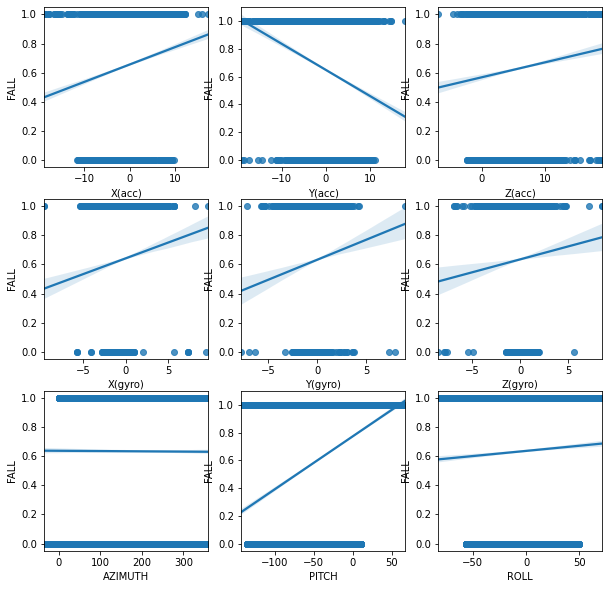

In [4]:
data_df=fall_data.loc[:,["X(acc)","Y(acc)","Z(acc)","X(gyro)","Y(gyro)","Z(gyro)","AZIMUTH","PITCH","ROLL"]]
data_columns=data_df.columns
data_columns
fig ,axs=plt.subplots(nrows=3,ncols=3,figsize=[10,10])
for i in range(0,len(data_columns)):
    rows=i//3
    cols=i%3
 
   
    plot=sns.regplot(x=data_columns[i], y="FALL", data=fall_data, ax=axs[rows,cols])

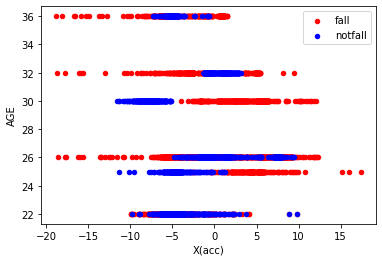

In [5]:
#distribution of the classes
fall=fall_data[fall_data["FALL"]==1]
notfall=fall_data[fall_data["FALL"]==0]
axes=fall.plot(kind='scatter',x='X(acc)',y='AGE',color='red',label='fall')
notfall.plot(kind='scatter',x='X(acc)',y='AGE',color='blue',label='notfall',ax=axes)

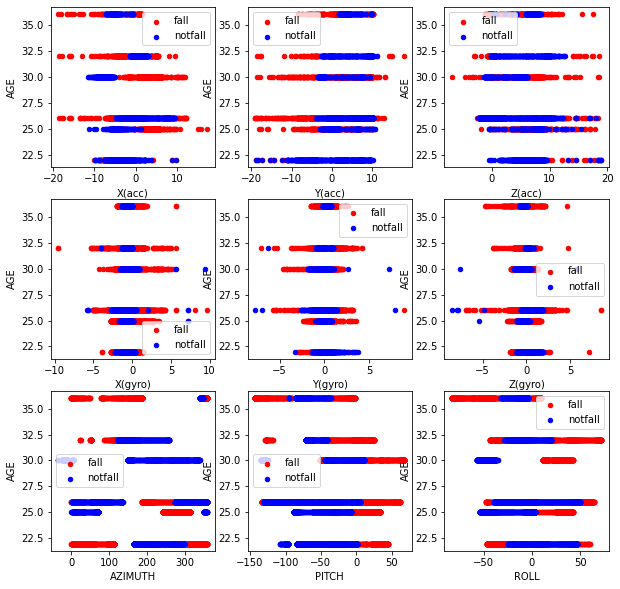

In [6]:
data_df=fall_data.loc[:,["X(acc)","Y(acc)","Z(acc)","X(gyro)","Y(gyro)","Z(gyro)","AZIMUTH","PITCH","ROLL"]]
data_columns=data_df.columns
data_columns
fig ,axs=plt.subplots(nrows=3,ncols=3,figsize=[10,10])
for i in range(0,len(data_columns)):
    rows=i//3
    cols=i%3
    fall=fall_data[fall_data["FALL"]==1]
    notfall=fall_data[fall_data["FALL"]==0]
    axes=fall.plot(kind='scatter',x=data_columns[i] ,y='AGE',color='red',label='fall',ax=axs[rows,cols])
   
    notfall.plot(kind='scatter',x=data_columns[i] ,y='AGE',color='blue',label='notfall',ax=axes)
 


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
fall_data_gender=fall_data["GENDER"]
fall_data_gender_encoded=encoder.fit_transform(fall_data_gender)
fall_data['GENDER']=fall_data_gender_encoded
fall_data['GENDER']

0        1
1        1
2        1
3        1
4        1
        ..
12685    0
12686    0
12687    0
12688    0
12689    0
Name: GENDER, Length: 12690, dtype: int32

In [8]:
#seperating x and y values from data
fall_data.columns
feature_df=fall_data[['X(acc)', 'Y(acc)', 'Z(acc)', 'AGE','HEIGHT', 'WEIGHT', 'X(gyro)','Y(gyro)', 'Z(gyro)', 'AZIMUTH', 'PITCH', 'ROLL','GENDER']]
feature_df
#independent var
X=np.asarray(feature_df)

#dependent var
y=np.asarray(fall_data["FALL"])

X[0:5]


array([[-3.7349546e-01,  1.0007763e+01, -5.8418524e-01,  2.6000000e+01,
         1.6900000e+02,  6.4000000e+01, -5.6538634e+00,  7.9458300e+00,
        -8.4962200e+00,  8.1267914e+01, -9.5822426e+01,  5.3357735e+00,
         1.0000000e+00],
       [-7.9487497e-01,  9.6246910e+00, -2.9688102e-01,  2.6000000e+01,
         1.6900000e+02,  6.4000000e+01, -5.6538634e+00,  3.9461896e-01,
        -7.9320850e+00,  8.3388596e+01, -9.5991060e+01,  5.3933450e+00,
         1.0000000e+00],
       [-8.1402856e-01,  9.9694560e+00, -1.0630256e+00,  2.6000000e+01,
         1.6900000e+02,  6.4000000e+01, -5.7549615e+00,  7.4342300e-01,
         3.4513887e-02,  8.1035960e+01, -9.5433235e+01,  5.3820133e+00,
         1.0000000e+00],
       [-8.3318220e-01,  9.9119950e+00, -1.0917560e+00,  2.6000000e+01,
         1.6900000e+02,  6.4000000e+01, -1.1676689e+00,  7.5044790e-01,
         3.2681290e-02,  8.0905130e+01, -9.3219530e+01,  3.1779182e+00,
         1.0000000e+00],
       [-8.5233580e-01,  9.8545340e+

In [9]:
#dividethe data as train/test dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(10152, 13)
(10152,)
(2538, 13)
(2538,)


#####  the below two cell is not necessary. it is programed just to get some information about y_test

In [10]:
#converting arrays into datafame to get some information about y_test:
df=pd.DataFrame(data=y_test,columns=['y_test'])
df



,y_test
0,1
1,0
2,1
3,1
4,1
...,...
2533,0
2534,1
2535,1
2536,1


In [11]:
df["y_test"].value_counts()

1    1611
0     927
Name: y_test, dtype: int64

In [12]:
#modelling
from sklearn import svm

classifier=svm.SVC(gamma=0.1,C=1000)
classifier.fit(X_train,y_train)

y_predict=classifier.predict(X_test)


In [13]:
#result

from sklearn import metrics


print(metrics.confusion_matrix(y_test,y_predict))

[[ 924    3]
 [   0 1611]]


In [14]:
print ('accuracy = {} '.format(metrics.accuracy_score(y_test,y_predict)))

accuracy = 0.9988179669030733 


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00      1611

    accuracy                           1.00      2538
   macro avg       1.00      1.00      1.00      2538
weighted avg       1.00      1.00      1.00      2538



In [16]:
from sklearn.metrics import mean_squared_error
#y_predict=classifier.predict(X_test)
fall_mse=mean_squared_error(y_test,y_predict)
fall_rmse=np.sqrt(fall_mse)
fall_rmse

0.034380708208626445

In [17]:
from sklearn.metrics import roc_curve,roc_auc_score

In [33]:
diagnol =[0 for _ in range( len(y_test)) ]
auc_diagonal=roc_auc_score(y_test,diagnol)
auc_svm=roc_auc_score(y_test,y_predict)

In [34]:
print ('svm area under curve = {}'.format(auc_svm))
print ('diagonal area under curve = {}'.format(auc_diagonal))

svm area under curve = 0.9983818770226538
diagonal area under curve = 0.5


In [35]:
r_d_fpr,r_d_tpr,_=roc_curve(y_test,diagnol)
r_svm_fpr,r_svm_tpr,_=roc_curve(y_test,y_predict)

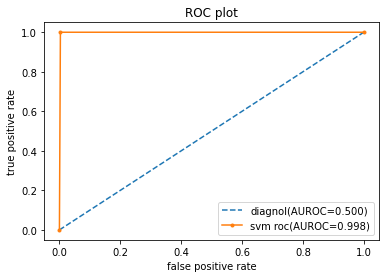

In [38]:
plt.plot(r_d_fpr,r_d_tpr,linestyle='--',label='diagnol(AUROC=%0.3f)'%auc_diagonal)
plt.plot(r_svm_fpr,r_svm_tpr,marker='.',label='svm roc(AUROC=%0.3f)'%auc_svm)
plt.title('ROC plot')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()